# U.S. Medical Insurance Costs

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Replace 'path_to_csv' with the actual path to your CSV file
csv_file_path = 'insurance.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Now you can work with the 'df' DataFrame to analyze and manipulate the data
print(df.head())  # Display the first few rows of the DataFrame

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max

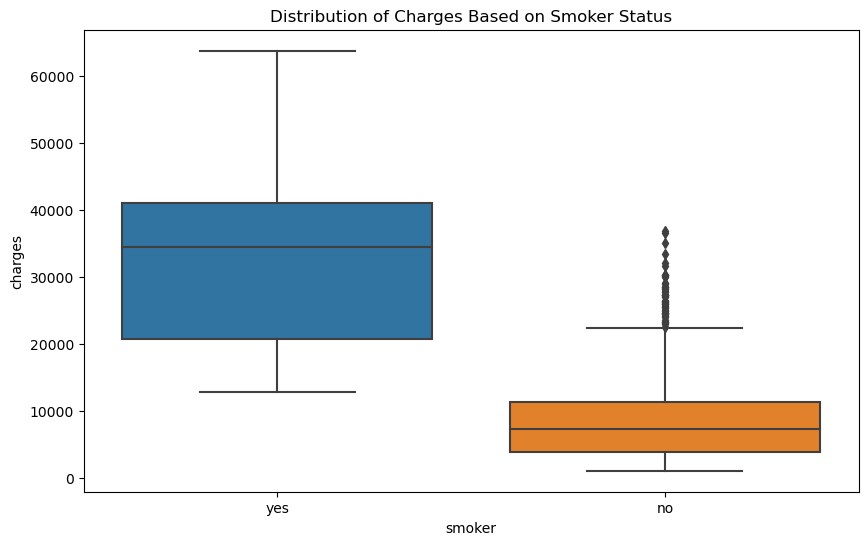

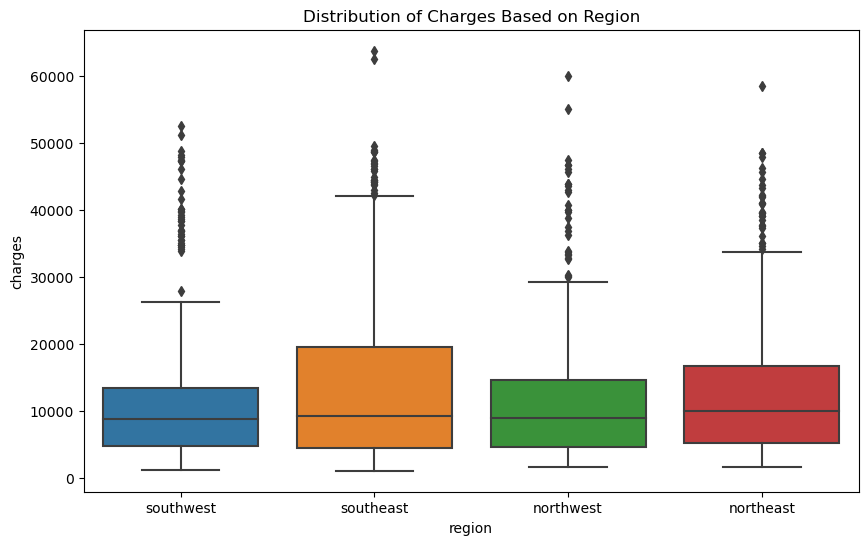

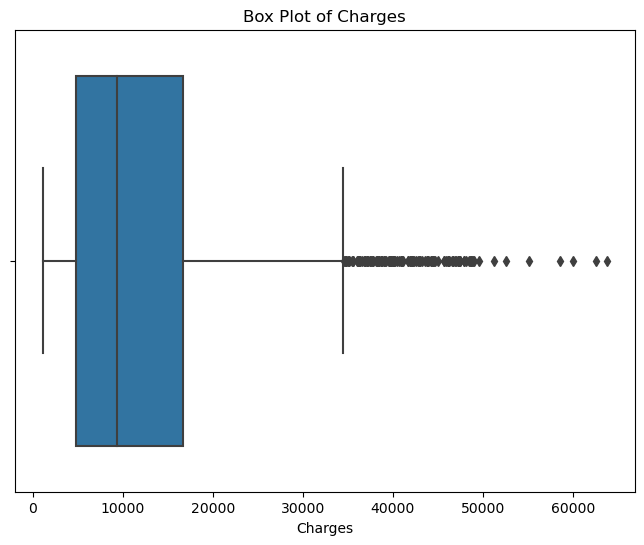

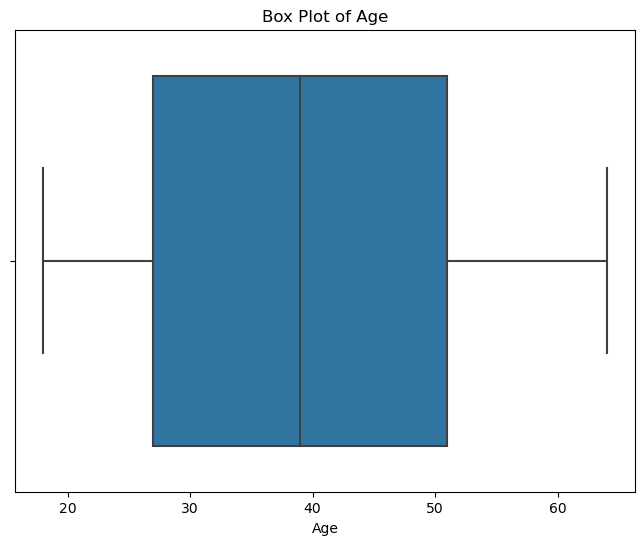

In [6]:
print(df.info())

# Summary statistics of numeric columns
print(df.describe())

# Distribution of charges based on smoker status
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Distribution of Charges Based on Smoker Status')
plt.show()

# Distribution of charges based on region
plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='charges', data=df)
plt.title('Distribution of Charges Based on Region')
plt.show()

# Outlier detection for 'charges' column using box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['charges'])
plt.title('Box Plot of Charges')
plt.xlabel('Charges')
plt.show()

# Outlier detection for 'age' column using box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['age'])
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()

In [7]:
# Calculate the IQR for 'charges'
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for potential outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify potential outliers
outliers = df[(df['charges'] < lower_bound) | (df['charges'] > upper_bound)]

# Display the potential outliers
print("Potential Outliers in 'charges' column:")
print(outliers[['age', 'charges']])

Potential Outliers in 'charges' column:
      age      charges
14     27  39611.75770
19     30  36837.46700
23     34  37701.87680
29     31  38711.00000
30     22  35585.57600
...   ...          ...
1300   45  62592.87309
1301   62  46718.16325
1303   43  37829.72420
1313   19  36397.57600
1323   42  43896.37630

[139 rows x 2 columns]


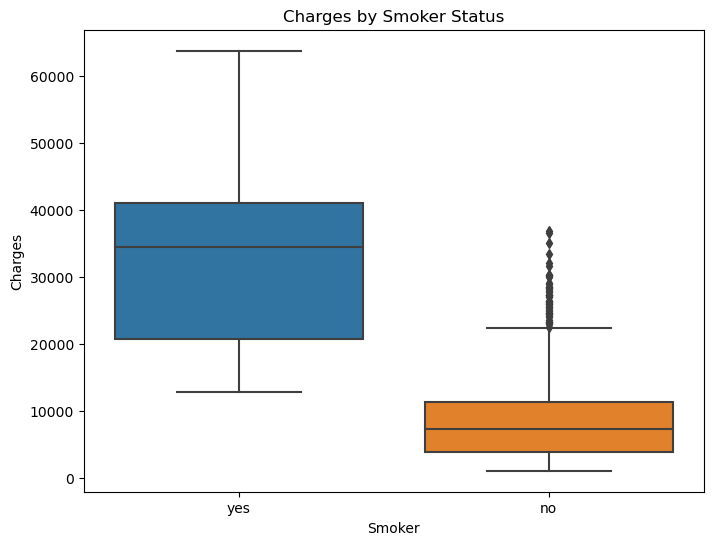

In [8]:
# Create a box plot of charges by smoker status
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Charges by Smoker Status')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

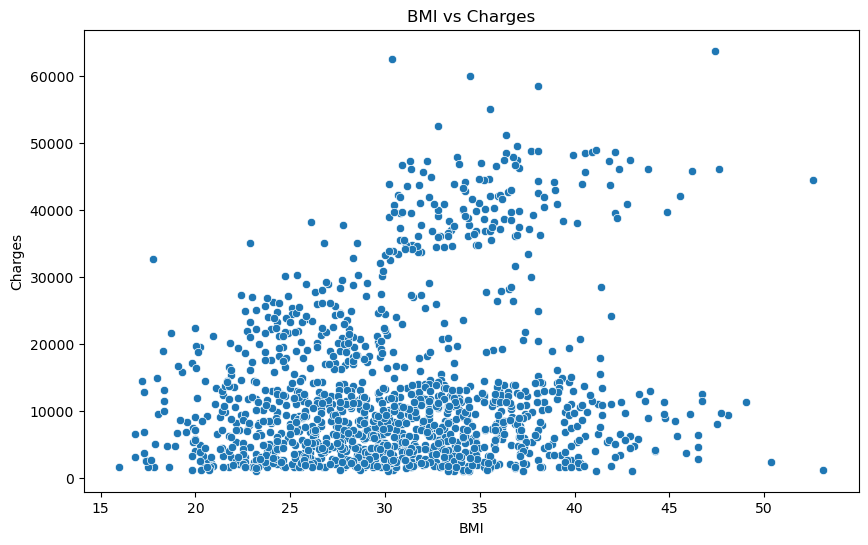

In [9]:
# Create a scatter plot of BMI vs Charges
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', data=df)
plt.title('BMI vs Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

In [10]:
correlation = df['bmi'].corr(df['charges'])
print(f"Correlation between BMI and Charges: {correlation:.2f}")

Correlation between BMI and Charges: 0.20


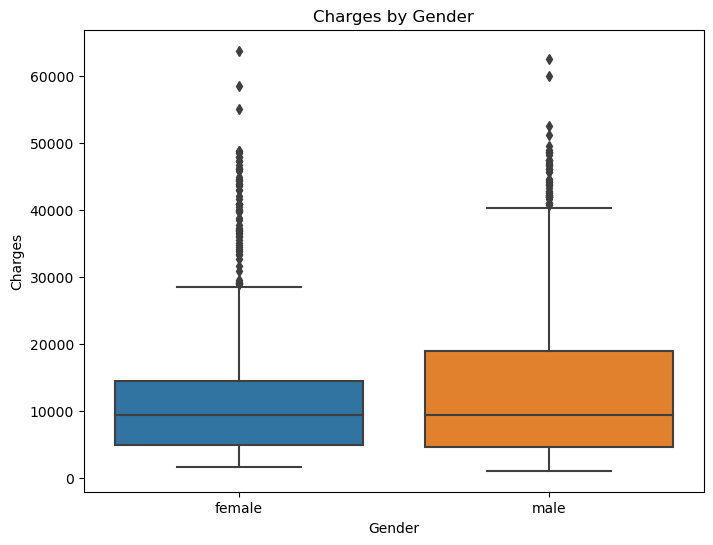

In [11]:
# Create a box plot of charges by gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='charges', data=df)
plt.title('Charges by Gender')
plt.xlabel('Gender')
plt.ylabel('Charges')
plt.show()

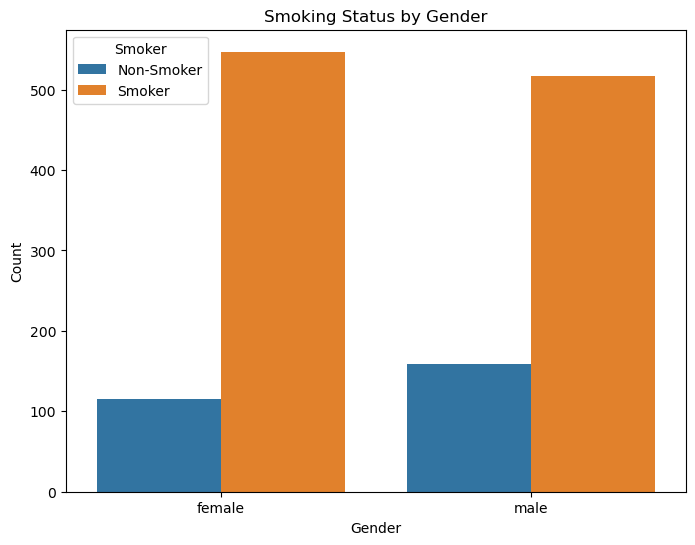

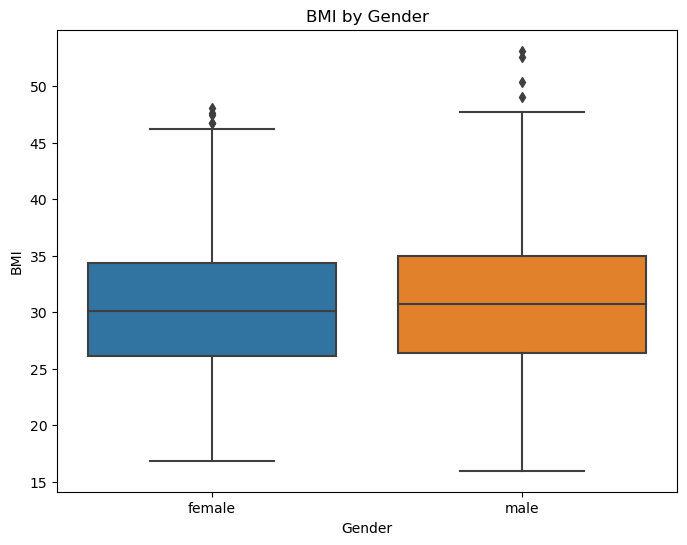

In [16]:
# Create a count plot to visualize smoking status by gender
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', hue='smoker', data=df)
plt.title('Smoking Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Smoker', labels=['Non-Smoker', 'Smoker'])
plt.show()

# Create box plots of BMI by gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='bmi', data=df)
plt.title('BMI by Gender')
plt.xlabel('Gender')
plt.ylabel('BMI')
plt.show()